First, let's import everything we need, and load some lower heating value data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some lower heating value data
from graphchem.datasets import load_lhv
smiles, lhv = load_lhv()
print(smiles[:3], '\n', lhv[:3])

['[C-]#[O+]', 'CO', 'C#C'] 
 [[10.0], [21.0], [48.0]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, lhv, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

310 310 78 78


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 48,
    'batch_size': 32,
    'learning_rate': 0.002,
    'lr_decay': 0.0000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 1491.8689821304813 | Valid Loss: 280.7094421386719
Epoch: 1 | Train Loss: 280.7357856996598 | Valid Loss: 280.7094421386719
Epoch: 2 | Train Loss: 177.5041016609438 | Valid Loss: 129.57264709472656
Epoch: 3 | Train Loss: 151.56168193201864 | Valid Loss: 126.09510803222656
Epoch: 4 | Train Loss: 143.44784152123236 | Valid Loss: 126.09510803222656
Epoch: 5 | Train Loss: 142.00066375732422 | Valid Loss: 110.46143341064453
Epoch: 6 | Train Loss: 121.44795768491683 | Valid Loss: 88.52388000488281
Epoch: 7 | Train Loss: 98.49766909691596 | Valid Loss: 75.29000854492188
Epoch: 8 | Train Loss: 85.2246327554026 | Valid Loss: 75.29000854492188
Epoch: 9 | Train Loss: 83.31397345758253 | Valid Loss: 75.29000854492188
Epoch: 10 | Train Loss: 110.49840397988596 | Valid Loss: 75.29000854492188
Epoch: 11 | Train Loss: 121.05464369250882 | Valid Loss: 74.58497619628906
Epoch: 12 | Train Loss: 103.07007623487904 | Valid Loss: 74.58497619628906
Epoch: 13 | Train Loss: 90.5570929742

Epoch: 110 | Train Loss: 5.4599123154917075 | Valid Loss: 22.026145935058594
Epoch: 111 | Train Loss: 6.089518823931294 | Valid Loss: 22.026145935058594
Epoch: 112 | Train Loss: 5.52515975890621 | Valid Loss: 22.026145935058594
Epoch: 113 | Train Loss: 5.422321319580078 | Valid Loss: 22.026145935058594
Epoch: 114 | Train Loss: 5.345855405253749 | Valid Loss: 22.026145935058594
Epoch: 115 | Train Loss: 5.593592505301198 | Valid Loss: 22.026145935058594
Epoch: 116 | Train Loss: 6.871968238584457 | Valid Loss: 22.026145935058594
Epoch: 117 | Train Loss: 3.997867415028234 | Valid Loss: 22.026145935058594
Epoch: 118 | Train Loss: 4.485982433442147 | Valid Loss: 21.064115524291992
Epoch: 119 | Train Loss: 4.427071279095065 | Valid Loss: 21.064115524291992
Epoch: 120 | Train Loss: 6.20421520356209 | Valid Loss: 19.75558853149414
Epoch: 121 | Train Loss: 4.526533488304384 | Valid Loss: 19.75558853149414
Epoch: 122 | Train Loss: 4.355928344111288 | Valid Loss: 19.75558853149414
Epoch: 123 | Tra

Epoch: 218 | Train Loss: 1.5186438983486545 | Valid Loss: 10.445535659790039
Epoch: 219 | Train Loss: 1.6297202302563576 | Valid Loss: 10.445535659790039
Epoch: 220 | Train Loss: 1.702839978279606 | Valid Loss: 10.445535659790039
Epoch: 221 | Train Loss: 1.7411507560360817 | Valid Loss: 10.445535659790039
Epoch: 222 | Train Loss: 1.9471208126314226 | Valid Loss: 10.445535659790039
Epoch: 223 | Train Loss: 1.8951215974746212 | Valid Loss: 10.445535659790039
Epoch: 224 | Train Loss: 2.20454046803136 | Valid Loss: 10.445535659790039
Epoch: 225 | Train Loss: 2.0459997423233522 | Valid Loss: 10.445535659790039
Epoch: 226 | Train Loss: 1.5765603588473411 | Valid Loss: 10.445535659790039
Epoch: 227 | Train Loss: 2.247507825974495 | Valid Loss: 10.445535659790039
Epoch: 228 | Train Loss: 1.630893426556741 | Valid Loss: 10.445535659790039
Epoch: 229 | Train Loss: 1.58402681350708 | Valid Loss: 10.445535659790039
Epoch: 230 | Train Loss: 1.8447369067899642 | Valid Loss: 10.445535659790039
Epoch:

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = 0.7913214719874528, MAE = 1.7062225341796875
Train Set: R2 = 0.9481418084360903, MAE = 0.9346351623535156


And let's plot our results:

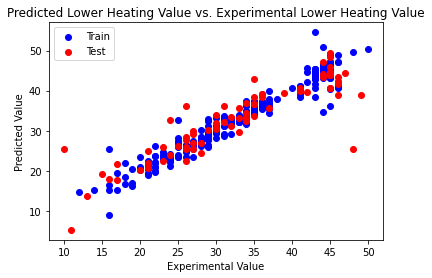

In [9]:
plt.title('Predicted Lower Heating Value vs. Experimental Lower Heating Value')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()